<a href="https://colab.research.google.com/github/thayyilakul/Word2Vec_From_Scratch/blob/main/Word2Vec_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
sentences = ['cat chases mouse',
        'cat catches mouse',
        'cat eats mouse',
        'mouse runs into hole',
        'cat says bad words',
        'cat and mouse are pals',
        'cat and mouse are chums',
        'mouse stores food in hole',
        'cat stores food in house',
        'mouse sleeps in hole',
        'cat sleeps in house',
        'cat and mouse are buddies',
        'mouse lives in hole',
        'cat lives in house'
]

In [ ]:
def get_vocab(data):
  i = 1
  word2idx = dict()
  idx2word = dict()
  temp = set()

  for sentence in sentences:
    for word in sentence.split():
      if word not in temp:
        temp.add(word)
        word2idx[word] = i
        idx2word[i] = word
        i += 1
  return i, word2idx, idx2word

vocab_size, word2idx, idx2word = get_vocab(sentences)

In [ ]:
vocab_size

23

In [ ]:
word2idx['cat'], idx2word[1]

(1, 'cat')

In [ ]:
def prev_words(i, doc, window_size):
  out = []
  for index in range(i-window_size, i):
    if index >= 0:
      out.append(word2idx[doc[index]])
    else:
      out.append(0) # 0 = <PAD>
  return out

In [ ]:
def next_words(i, doc, window_size):
  out = []
  for index in range(i+1, i+window_size+1, 1):
    if index < len(doc):
      out.append(word2idx[doc[index]])
    else:
      out.append(0) # 0 = <PAD>
  return out

In [ ]:
def get_training_data(sentences, window_size=6):
  X = []
  y = []
  for sentence in sentences:
    xi = []
    yi = []
    sentence = sentence.split()
    for index, word in enumerate(sentence):
      prev = prev_words(index, sentence, window_size//2)
      next = next_words(index, sentence, window_size//2)
      assert len(prev) == len(next)
      xi.append(prev + next)
      yi.append([word2idx[word]])
    X.extend(xi)
    y.extend(yi)
  return X, y

In [ ]:
window_size = 6
X, y = get_training_data(sentences, window_size)

In [ ]:
[idx2word[i] for i in y[1]], len(X)

(['chases'], 58)

In [ ]:
embed_size = 2

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embed_size, input_length = 6, name = 'embedding_1'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(vocab_size, activation = 'softmax')]
)

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.fit(tf.convert_to_tensor(X), tf.convert_to_tensor(y), epochs = 50, batch_size = 6)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1344
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1294 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1252 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1215 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1160 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1089 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1108  
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1041  
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0955 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0972 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0949 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0840 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0849 
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0747 
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0695 
Epo

In [ ]:
word = 'cat'
input_vec = tf.convert_to_tensor([word2idx[word]])
model.get_layer('embedding_1')(input_vec).numpy().tolist()

[[0.0655151754617691, 0.2620899975299835]]

In [ ]:
word2vec = []
for word, word_index  in word2idx.items():
  input_vec = tf.convert_to_tensor([word2idx[word]])
  emb = model.get_layer('embedding_1')(input_vec).numpy().tolist()[0]
  word2vec.append((word, emb))

In [ ]:
word2vec[1]

('chases', [0.1547842025756836, 0.26562994718551636])

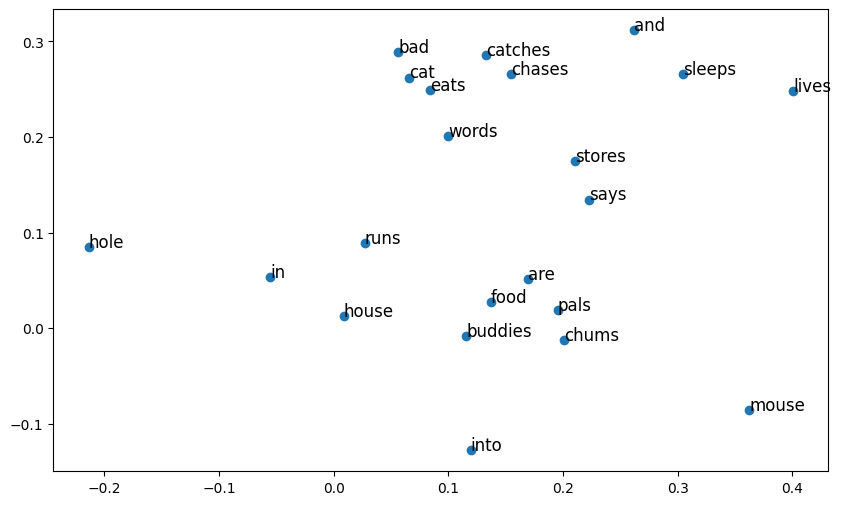

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter([i[1][0] for i in word2vec], [i[1][1] for i in word2vec])
for item in word2vec:
  word = item[0]
  plt.text(item[1][0], item[1][1], word, fontdict={'fontsize':12})
plt.show()